In [12]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [13]:
hidden_nodes = 225
epochs = 1
lr = 1e-4
samples = 60000
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 1
s = 0.1
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

W1 = np.random.normal(0,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(0,1,(1,hidden_nodes))
W2 = np.random.normal(0,1,(hidden_nodes,input_size))
Bi2 = np.random.normal(0,1,(1,input_size))

In [14]:
epochs = 20
for i in range(epochs):
    loss = 0
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    S  = np.zeros(W1.shape)
    #forward pass
    out1 = layer(X,W1,Bi1)
    z = sigm(out1)
    out2 = layer(z,W2,Bi2)
    y = sigm(out2)
    #BACKPROPAGATION
    del1 = 2*(y-X)*diff_sigm(out2)
    b2 = np.sum(del1, axis = 0).reshape(np.shape(Bi2))
    w2 = np.matmul(z.T,del1)
    zm = np.mean(z , axis = 0)
#     print(z.shape,zm.shape)
    ge = Lambda*(-s/zm + (1-s)/(samples-zm))*diff_sigm(out1)
#     print(ge.shape)
    s1 = ge-np.multiply(diff_sigm(out1),np.sum(del1, axis=1).reshape(samples,1))
    b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    w1 = np.matmul(X.T,s1)
    loss = np.sum(np.linalg.norm(y-X)**2)
    print("Loss =",loss)
    W1 -= lr*w1
    W2 -= lr*w2
    Bi1 -= lr*b1
    Bi2 -= lr*b2

Loss = 4975782.437183783
Loss = 2234512.2304246062
Loss = 2060780.0155941702
Loss = 2052264.1246037397
Loss = 1972230.447938219
Loss = 1869462.6077882594
Loss = 1857135.5259456716
Loss = 1819361.5634982716
Loss = 1850834.7500165394
Loss = 1821557.8094130044
Loss = 1802632.7504565807
Loss = 1805049.5876431153
Loss = 1843843.4959587718
Loss = 1842463.560033863
Loss = 1786385.1589900113
Loss = 1786253.4453010564
Loss = 1786200.064272284
Loss = 1727876.4557197806
Loss = 1709470.6761359312
Loss = 1705633.9944501938


In [15]:
out1 = layer(X,W1,Bi1)
z = sigm(out1)
out2 = layer(z,W2,Bi2)
y = sigm(out2)
y = y*255.0

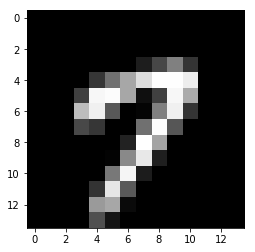

In [18]:
plt.imshow(X[15].reshape(14,14) , cmap='gray')

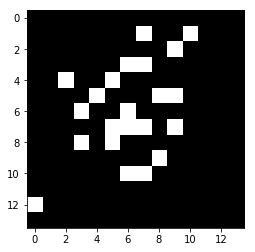

In [19]:
plt.imshow(y[15].reshape(14,14) , cmap='gray' )